#### OTU as a function of fastq_maxee, min_size, fastq_trunclen

In [1]:
import os, subprocess, IPython.display, re
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fastq_dir = '~/fastqs/*_R1_*.fastq'

In [2]:
def usearch_func(maxee, trunclen, minsize):
    """return merge,filter,derep, and cluster output strings """
    commands = ['usearch -fastq_mergepairs %s -relabel @ \
                 -fastqout merged.fastq' %fastq_dir,    
                
                'usearch -fastq_filter merged.fastq \
                 -fastq_maxee %f -fastq_trunclen %d \
                 -fastaout seqs.fna -fastqout seqs.fastq' %(maxee, trunclen), 
                
                'fastqc seqs.fastq --extract --quiet',
                'usearch -cluster_otus seqs.derep.fna -sizein -minsize %d \
                 -otus rep_set.fa -relabel OTU_' %minsize ]
    output = ''
    for command in commands:
        out = subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
        output = output + out + '\n'
    return output

In [3]:
def summarize_usearch(usearch_output):
    """return a list len = 3 of tuples (1000, 'FASTQ')"""
    search_list = [r'\d+\s+FASTQ', r'\d+\s+Converted', r'\d\d\sOTUs']
    res_list = []
    for pattern in search_list:
        match = re.search(pattern, usearch_output)
        matched_string = match.group()
        num, name = matched_string.split()
        num = int(num)
        res_list.append((num, name))
    return res_list

In [16]:
def plot_maxee():
    x = np.arange(0.1, 5.2, 0.4)
    results = []
    for ee in x:
        results.append(summarize_usearch(usearch_func(ee, 250, 5)))

    totalq, highq = [], []
    for lst in results:
        totalq.append(float(lst[0][0]) )
        highq.append( float(lst[1][0]) )

    y = np.divide(np.array(highq), np.array(totalq))
    plt.plot(x, y)

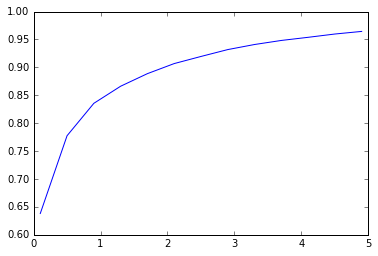

In [17]:
plot_maxee()

In [23]:
def plot_minsize_OTU():
    """plot n_otus versus minsize"""
    x = np.arange(1,15)
    results = []
    for minsize in x:
        results.append(summarize_usearch(usearch_func(1.0, 250, minsize)))

    n_otus = []
    for lst in results:
        n_otus.append(lst[2][0])

    y = n_otus
    plt.plot(x, y)

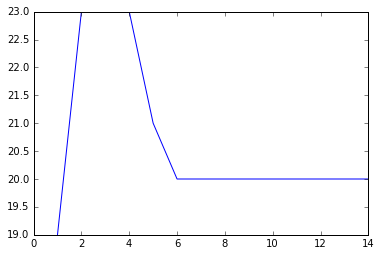

In [24]:
plot_minsize_OTU()

In [7]:
#otuTable = 'usearch -usearch_global merged.fastq -db rep_set.fa -id 0.97 -strand plus -biomout otu.json'
#subprocess.call(otuTable, shell=True)